In [1]:
from algo.cql import CQLSAC
import pandas as pd
import numpy as np
import data_preprocessing as dp
import mdp
import data_preprocessing as dp
import Replay_Buffer
import torch as T
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import osmnx as ox
import matplotlib.animation as animation
from matplotlib.image import imread

In [ ]:
## ego - 981102

In [2]:
# Parameters to be passed
random.seed(42)
T.manual_seed(42)
np.random.seed(42)
state_dim = 29
action_dim = 2
max_action = 40
device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')

In [3]:
# Replay Buffer to be used to train
replay_buffer = Replay_Buffer.ReplayBuffer(state_dim, action_dim, device, 1000000)
replay_buffer.load(f"buffers/DR_USA_Roundabout_FT")
train_timesteps = 100000

In [4]:
states, actions, next_states, rewards, not_done = replay_buffer.sample(10000)

In [5]:
# Calling SAC-CQL
policy = CQLSAC(state_dim, action_dim, device)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [6]:
actor_loss = []
critic_loss = []
q_val =[]
training_iters = 0

In [7]:
%%time
for epoch in range(4):
    for itr in range(5000):
        info = policy.train(replay_buffer, batch_size = 128)        
        actor_loss.append(info['actor_loss'])
        critic_loss.append(info['critic_loss'])
        q_val.append(info['q_val'])
        training_iters += 1
    
    #policy.save(f"./models/CQLSAC")
    # for timestamp in df_eval_timesteps:
    #     ego_id = 981102
    #     curr_time = timestamp
    #     other_agents, interactive_agents = mdp.get_other_agents_unique_id(ego_id, curr_time, uniqueTracks)
    #     mdp_tuple = mdp.get_mdp_tuple(ego_id, interactive_agents, curr_time, uniqueTracks, v_max)
    #     s, a, r, s_next, the_last_episode = mdp_tuple
    #     action = policy.select_action(np.array(s))
    #     print(action)
    #     break
    #action = policy.select_action(np.array(s))
    #for 

    ### ADD MODEL CHECKPOINTS AFTER EACH EPOCH
    ### ADD PER EPOCH EVALUATION ###
    

CPU times: user 17min 19s, sys: 40min 44s, total: 58min 4s
Wall time: 6min 38s


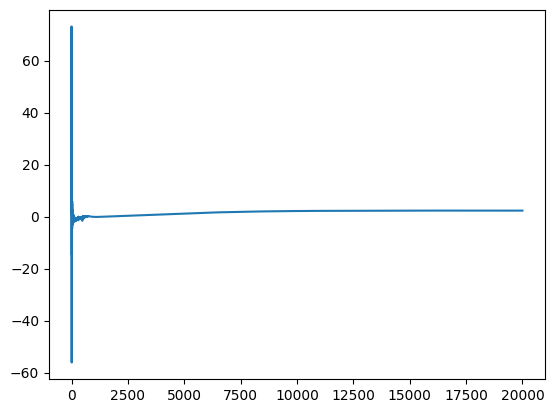

In [8]:
plt.plot(q_val)

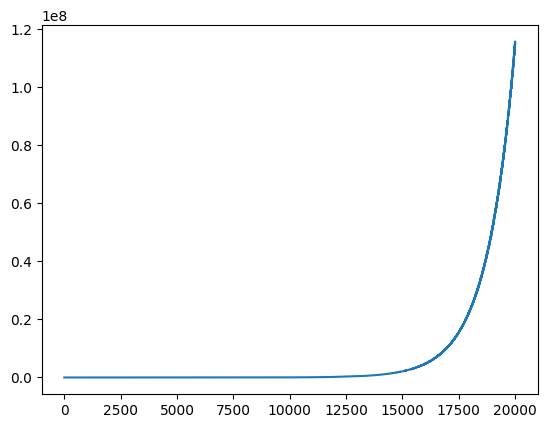

In [9]:
plt.plot(actor_loss)

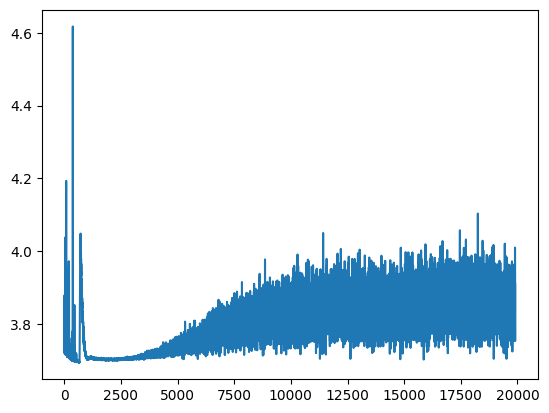

In [10]:
plt.plot(critic_loss[100:50000])

## Evaluating Agent

## Underlying movement of ego 101

In [11]:
val_data = 'INTERACTION/DR_USA_Roundabout_FT_val.csv'
val_df = pd.read_csv(val_data)

# add a new label unique_id using case_id and track_id
val_df['unique_id'] = val_df['case_id'].astype(int) * 100+ val_df['track_id']

# change length, width and psi_rad from NaN to 0 for pedestrain/bicycle
val_df.loc[val_df['agent_type'] == 'pedestrian/bicycle', 'length'] = 0
val_df.loc[val_df['agent_type'] == 'pedestrian/bicycle', 'width'] = 0
val_df.loc[val_df['agent_type'] == 'pedestrian/bicycle', 'psi_rad'] = 0


### important!!!
# agent_type pedestrain/bicycle = -1
# agent_type car = 1
val_df.loc[val_df['agent_type'] == 'pedestrian/bicycle', 'agent_type'] = -1
val_df.loc[val_df['agent_type'] == 'car', 'agent_type'] = 1

v_max = v_max = max(val_df['vx']**2 + val_df['vy']**2) ** 0.5
uniqueTracks_test = dp.read_uniqueTracks(val_df)

In [53]:
other_agents, interactive_agents = mdp.get_other_agents_unique_id(501, 100, uniqueTracks_test)

In [54]:
interactive_agents

[505, 502, 503]

In [104]:
data = val_df[val_df['unique_id'] == 501]
data2 = val_df[val_df['unique_id'] == 505]
data3 = val_df[val_df['unique_id'] == 502]
data4 = val_df[val_df['unique_id'] == 503]
#data5 = df_train_small[df_train_small['unique_id'] == 606]

fig, ax = plt.subplots()

#background_image = imread('INTERACTION/map.png')

# Display the image on the plot
#ax.imshow(background_image, extent=[950, 1060, 950, 1020])

xdata, ydata = [], []
xdata2, ydata2 = [], []
xdata3, ydata3 = [], []
xdata4, ydata4 = [], []
#xdata5, ydata5 = [], []
ln, = plt.plot([], [], 'ro')  # 'ro' 表示紅色的圓點
ln2, = plt.plot([], [], 'bo')
ln3, = plt.plot([], [], 'bo')
ln4, = plt.plot([], [], 'bo')
#ln5, = plt.plot([], [], 'rs')

def init():
    ax.set_xlim(950, 1060)  # 根據數據的 x 值範圍設定
    ax.set_ylim(950, 1020)  # 根據數據的 y 值範圍設定
    return ln, ln2, ln3, ln4#, ln5

def update(frame):
    xdata.append(data.iloc[frame]['x'])
    ydata.append(data.iloc[frame]['y'])
    ln.set_data(xdata, ydata)

    if frame < len(data2):
        xdata2.append(data2.iloc[frame]['x'])
        ydata2.append(data2.iloc[frame]['y'])
        ln2.set_data(xdata2, ydata2)
    else:
        ln2.set_data(xdata2, ydata2)
    #'''
    if frame < len(data3):
        xdata3.append(data3.iloc[frame]['x'])
        ydata3.append(data3.iloc[frame]['y'])
        ln3.set_data(xdata3, ydata3)
    else:
        ln3.set_data(xdata3, ydata3)

    if frame < len(data4):
        xdata4.append(data4.iloc[frame]['x'])
        ydata4.append(data4.iloc[frame]['y'])
        ln4.set_data(xdata4, ydata4)
    else:
        ln4.set_data(xdata4, ydata4)
    '''
    if frame < len(data5):
        xdata5.append(data5.iloc[frame]['x'])
        ydata5.append(data5.iloc[frame]['y'])
        ln5.set_data(xdata5, ydata5)
    else:
        ln5.set_data(xdata5, ydata5)
    '''
    
    return ln, ln2, ln3, ln4#, ln5

ani = animation.FuncAnimation(fig, update, frames=range(len(data)),
                    init_func=init, blit=False)

#plt.show()
# To display the animation in a Jupyter notebook you can use the following:
plt.close(fig)  # Avoid displaying the static plot
from IPython.display import HTML
HTML(ani.to_jshtml())  # Convert the animation to JSHTML and display it


## Movement by out agent starting from ego 101 state

In [89]:
timestep = val_df[val_df['unique_id']==501].timestamp_ms
timestep = timestep.reset_index(drop=True)

In [101]:
def get_next_pos_pred(ego_x, ego_y, ego_heading, ego_vx, ego_vy):
    vehicle_speed = (ego_vx ** 2 + ego_vy ** 2) ** 0.5
    next_point_pos_x = ego_x + vehicle_speed * math.cos(ego_heading)/10
    next_point_pos_y = ego_y + vehicle_speed * math.sin(ego_heading)/10
    next_point_pos = (next_point_pos_x, next_point_pos_y)

    return [next_point_pos_x, next_point_pos_y]

In [102]:
other_agents, interactive_agents = mdp.get_other_agents_unique_id(501, timestep[0], uniqueTracks_test)
mdp_tuple = mdp.get_mdp_tuple(501, interactive_agents, timestep[0], uniqueTracks_test, v_max)
s, a, r, s_next, the_last_episode = mdp_tuple
x = [s[4]]
y= [s[5]]
x1 = [s[12]]
y1 = [s[13]]
x2 = [s[18]]
y2 = [s[19]]
x3 = [s[24]]
y3 = [s[25]]
for current_time in timestep[1:-1]:
    vx,vy = policy.select_action(np.array(s))
    new_x,new_y = get_next_pos_pred(s[4],s[5],s[8],vx,vy)
    x.append(new_x)
    y.append(new_y)
    other_agents, interactive_agents = mdp.get_other_agents_unique_id(501, current_time, uniqueTracks_test)
    mdp_tuple = mdp.get_mdp_tuple(501, interactive_agents, current_time, uniqueTracks_test, v_max)
    s, a, r, s_next, the_last_episode = mdp_tuple
    s[4] = new_x
    s[5] = new_y
    s[6] = vx
    s[7] = vy
    x1.append(s[12])
    y1.append(s[13])
    x2.append(s[18])
    y2.append(s[19])
    x3.append(s[24])
    y3.append(s[25])


In [105]:
data = x
data2 = x1
data3 = x2
data4 = x3
#data5 = df_train_small[df_train_small['unique_id'] == 606]

fig, ax = plt.subplots()

#background_image = imread('INTERACTION/map.png')

# Display the image on the plot
#ax.imshow(background_image, extent=[950, 1060, 950, 1020])

xdata, ydata = [], []
xdata2, ydata2 = [], []
xdata3, ydata3 = [], []
xdata4, ydata4 = [], []
#xdata5, ydata5 = [], []
ln, = plt.plot([], [], 'ro')  # 'ro' 表示紅色的圓點
ln2, = plt.plot([], [], 'bo')
ln3, = plt.plot([], [], 'bo')
ln4, = plt.plot([], [], 'bo')
#ln5, = plt.plot([], [], 'rs')

def init():
    ax.set_xlim(950, 1060)  # 根據數據的 x 值範圍設定
    ax.set_ylim(950, 1020)  # 根據數據的 y 值範圍設定
    return ln, ln2, ln3, ln4#, ln5

def update(frame):
    xdata.append(x[frame])
    ydata.append(y[frame])
    ln.set_data(xdata, ydata)

    if frame < len(data2):
        xdata2.append(x1[frame])
        ydata2.append(y1[frame])
        ln2.set_data(xdata2, ydata2)
    else:
        ln2.set_data(xdata2, ydata2)
    #'''
    if frame < len(data3):
        xdata3.append(x2[frame])
        ydata3.append(y2[frame])
        ln3.set_data(xdata3, ydata3)
    else:
        ln3.set_data(xdata3, ydata3)

    if frame < len(data4):
        xdata4.append(x3[frame])
        ydata4.append(y3[frame])
        ln4.set_data(xdata4, ydata4)
    else:
        ln4.set_data(xdata4, ydata4)
    '''
    if frame < len(data5):
        xdata5.append(data5.iloc[frame]['x'])
        ydata5.append(data5.iloc[frame]['y'])
        ln5.set_data(xdata5, ydata5)
    else:
        ln5.set_data(xdata5, ydata5)
    '''
    
    return ln, ln2, ln3, ln4#, ln5

ani = animation.FuncAnimation(fig, update, frames=range(len(data)),
                    init_func=init, blit=False)

#plt.show()
# To display the animation in a Jupyter notebook you can use the following:
plt.close(fig)  # Avoid displaying the static plot
from IPython.display import HTML
HTML(ani.to_jshtml())  # Convert the animation to JSHTML and display it
